In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
people_data = pd.read_csv('turnover.csv')
people_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
people_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
people_data.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
people_data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
people_data.salary = people_data.salary.astype("category").cat.reorder_categories(["low","medium","high"]).cat.codes

In [7]:
departments = pd.get_dummies(people_data.department)
departments = departments.drop(["accounting"],axis=1)

In [8]:
people_data = people_data.drop(["department"],axis=1)
people_data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0


In [9]:
100.0*people_data.churn.value_counts()/len(people_data)

0    76.191746
1    23.808254
Name: churn, dtype: float64

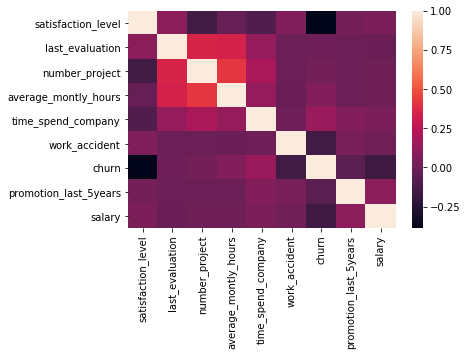

In [10]:
sns.heatmap(people_data.corr())
plt.show()

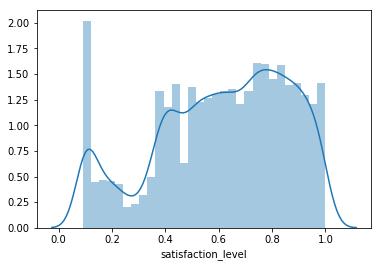

In [11]:
sns.distplot(people_data.satisfaction_level)
plt.show()

In [12]:
people_data = people_data.join(departments)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
model_tree = DecisionTreeClassifier(random_state=42)
model_logit = LogisticRegression(random_state=42)


In [15]:
y = people_data.churn
x = people_data.drop("churn",axis=1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [18]:
model_tree.score(x_train,y_train)*100

100.0

In [19]:
model_tree.score(x_test,y_test)*100

97.22666666666666

In [21]:
model_logit.fit(x_train,y_train)
model_logit.score(x_train,y_train)*100


79.5715174682194

In [22]:
model_logit.score(x_test,y_test)*100

79.09333333333333

In [23]:
model_tree_7 = DecisionTreeClassifier(max_depth = 7, random_state=42)
model_tree_7.fit(x_train,y_train)
model_tree_7.score(x_train,y_train)*100

98.28429193706107

In [24]:
model_tree_7.score(x_test,y_test)*100


97.41333333333333

In [25]:
model_tree_100 = DecisionTreeClassifier(min_samples_leaf=100,random_state=42)
model_tree_100.fit(x_train,y_train)
model_tree_100.score(x_train,y_train)*100

96.57747355320473

In [26]:
model_tree_100.score(x_test,y_test)*100 

96.13333333333334

In [29]:
from sklearn.model_selection import cross_val_score


In [30]:
print(cross_val_score(model_tree_7, x, y, cv=10))


[0.98401066 0.97666667 0.97733333 0.974      0.97333333 0.97466667
 0.98333333 0.97666667 0.98198799 0.98198799]


In [31]:
overfitting = [0.98401066, 0.97666667, 0.97733333, 0.974, 0.97333333, 0.97466667, 0.98333333, 0.97666667, 0.98198799, 0.98198799]
print (np.mean(overfitting))


0.978398664


In [32]:
model_tree_7_b = DecisionTreeClassifier(class_weight="balanced", max_depth=7, random_state=42)


In [33]:
print(cross_val_score(model_tree_7_b, x, y, cv=10))


[0.97801466 0.974      0.96933333 0.97       0.96733333 0.96933333
 0.97666667 0.968      0.97731821 0.97731821]


In [34]:
print(np.mean(cross_val_score(model_tree_7_b, x, y, cv=10)))


0.9727317747844927


In [35]:
from sklearn.metrics import recall_score
prediction = model_tree_7.predict(x_test)
recall_score(y_test,prediction)*100

92.86510590858417

In [36]:
model_tree_7_b.fit(x_train, y_train)
prediction_b = model_tree_7_b.predict(x_test)
recall_score(y_test, prediction_b)*100

93.19955406911929

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,prediction)*100

95.8542143633352

In [38]:
roc_auc_score(y_test,prediction_b)*100


95.9863876199084

In [39]:
importances = model_tree_7_b.feature_importances_


In [40]:
importances

array([0.46585815, 0.10611173, 0.02134919, 0.04180155, 0.35527476,
       0.        , 0.        , 0.00436262, 0.        , 0.        ,
       0.00160241, 0.        , 0.        , 0.        , 0.00101934,
       0.00062708, 0.00199316])

In [41]:
features = pd.DataFrame(data=importances, columns = ["importances"], index = x.columns)


In [42]:
features


,importances
satisfaction_level,0.465858
last_evaluation,0.106112
number_project,0.021349
average_montly_hours,0.041802
time_spend_company,0.355275
work_accident,0.000000
promotion_last_5years,0.000000
salary,0.004363
IT,0.000000
RandD,0.000000


In [44]:
selected = features[features.importances>0.1]


In [45]:
selected

,importances
satisfaction_level,0.465858
last_evaluation,0.106112
time_spend_company,0.355275


In [46]:
selected_features = selected.index  #if columns it would take columns


In [47]:
selected_features


Index(['satisfaction_level', 'last_evaluation', 'time_spend_company'], dtype='object')

In [48]:
x_train_new = x_train[selected_features]


In [1]:
x_train_new.head()


NameError: name 'x_train_new' is not defined

In [50]:
model_tree_7_b.fit(x_train_new, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [51]:
x_test_new = x_test[selected_features]
model_tree_7_b.score(x_test_new, y_test)

0.9704

In [53]:
prediction_b_selected = model_tree_7_b.predict(x_test_new)
recall_score(y_test, prediction_b_selected)

0.9286510590858417

In [54]:
model_tree_7_b.predict([[0.8, 0.5, 2]])


array([0], dtype=int64)